In [ ]:
#system("source activate sf_test")

In [ ]:
#install.packages('ggplot2')
#install.packages("dplyr")

In [20]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [1]:
#find the .BED files of Roadmap enhancers intersected with hg19 files containing species counts
path <- "/dors/capra_lab/users/fongsl/broadly_active_enhancers/data/roadmap_multi_data/hg38/human_specific"
setwd(path)

In [3]:
a <- list.files()

In [4]:
print(a)

 [1] "bae_summary_hg38spec_x_roadmap.txt"      
 [2] "chr1_hspec_x_hg38.bed"                   
 [3] "chr10_hspec_x_hg38.bed"                  
 [4] "chr11_hspec_x_hg38.bed"                  
 [5] "chr12_hspec_x_hg38.bed"                  
 [6] "chr13_hspec_x_hg38.bed"                  
 [7] "chr14_hspec_x_hg38.bed"                  
 [8] "chr15_hspec_x_hg38.bed"                  
 [9] "chr16_hspec_x_hg38.bed"                  
[10] "chr17_hspec_x_hg38.bed"                  
[11] "chr18_hspec_x_hg38.bed"                  
[12] "chr19_hspec_x_hg38.bed"                  
[13] "chr2_hspec_x_hg38.bed"                   
[14] "chr20_hspec_x_hg38.bed"                  
[15] "chr21_hspec_x_hg38.bed"                  
[16] "chr22_hspec_x_hg38.bed"                  
[17] "chr3_hspec_x_hg38.bed"                   
[18] "chr4_hspec_x_hg38.bed"                   
[19] "chr5_hspec_x_hg38.bed"                   
[20] "chr6_hspec_x_hg38.bed"                   
[21] "chr7_hspec_x_hg38.bed"            

In [10]:
bedfile = a[25]
print(bedfile)
df <-read.table(bedfile, sep = '\t', h=T, stringsAsFactors=F, nrows=20000)
dim(df)

[1] "hg38_human_specific_x_100species.bed"


[1] 4958   15

In [16]:
head(df)

enh_chr,enh_start,enh_end,enh_overlap,enh_percentile,hg_chr,hg_start,hg_end,hg_strand,hg_ref,hg_spec,hg_vspec,hg-spec_names,length,NA,log10_length
chr1,180680,181024,1,0.10,chr1,180904,181582,+,NA,0,0,[],120,2.0791812,2.0791812
chr1,1588651,1588801,1,0.10,chr1,1588447,1589160,+,NA,0,0,[],150,2.1760913,2.1760913
chr1,1720651,1720748,1,0.10,chr1,1720694,1720891,+,NA,0,0,[],54,1.7323938,1.7323938
chr1,1720748,1720776,2,0.26,chr1,1720694,1720891,+,NA,0,0,[],28,1.4471580,1.4471580
chr1,1720776,1720932,3,0.39,chr1,1720694,1720891,+,NA,0,0,[],115,2.0606978,2.0606978
chr1,1720932,1721032,4,0.48,chr1,1720956,1720959,+,NA,0,0,[],3,0.4771213,0.4771213


In [17]:
# format the table

# rename columns
names(df) = c("enh_chr", "enh_start", "enh_end", "enh_overlap", "enh_percentile", "hg_chr", "hg_start", "hg_end", "hg_strand", "hg_ref", "hg_spec", "hg_vspec", "hg-spec_names", "length")

# convert species count columns from characters to integers 
df$hg_spec <- as.integer(df$hg_spec)
df$hg_vspec <- as.integer(df$hg_vspec)

# calculate the length of fragment overlap in log10
df$log10_length = log(df$length, 10)
head(df)

# create a subset of the dataframe to remove non-overlapping roadmap fragments in hg19 MSA
df2 = subset(df, df$length >0)

#make a subset of the counts
df_count <-plyr::count(df2, vars = c( "hg_spec","enh_overlap"))

head(df2)

enh_chr,enh_start,enh_end,enh_overlap,enh_percentile,hg_chr,hg_start,hg_end,hg_strand,hg_ref,hg_spec,hg_vspec,hg-spec_names,length,NA,NA,log10_length
chr1,180680,181024,1,0.10,chr1,180904,181582,+,NA,0,0,[],120,2.0791812,2.0791812,2.0791812
chr1,1588651,1588801,1,0.10,chr1,1588447,1589160,+,NA,0,0,[],150,2.1760913,2.1760913,2.1760913
chr1,1720651,1720748,1,0.10,chr1,1720694,1720891,+,NA,0,0,[],54,1.7323938,1.7323938,1.7323938
chr1,1720748,1720776,2,0.26,chr1,1720694,1720891,+,NA,0,0,[],28,1.4471580,1.4471580,1.4471580
chr1,1720776,1720932,3,0.39,chr1,1720694,1720891,+,NA,0,0,[],115,2.0606978,2.0606978,2.0606978
chr1,1720932,1721032,4,0.48,chr1,1720956,1720959,+,NA,0,0,[],3,0.4771213,0.4771213,0.4771213


enh_chr,enh_start,enh_end,enh_overlap,enh_percentile,hg_chr,hg_start,hg_end,hg_strand,hg_ref,hg_spec,hg_vspec,hg-spec_names,length,NA,NA.1,log10_length
chr1,180680,181024,1,0.10,chr1,180904,181582,+,NA,0,0,[],120,2.0791812,2.0791812,2.0791812
chr1,1588651,1588801,1,0.10,chr1,1588447,1589160,+,NA,0,0,[],150,2.1760913,2.1760913,2.1760913
chr1,1720651,1720748,1,0.10,chr1,1720694,1720891,+,NA,0,0,[],54,1.7323938,1.7323938,1.7323938
chr1,1720748,1720776,2,0.26,chr1,1720694,1720891,+,NA,0,0,[],28,1.4471580,1.4471580,1.4471580
chr1,1720776,1720932,3,0.39,chr1,1720694,1720891,+,NA,0,0,[],115,2.0606978,2.0606978,2.0606978
chr1,1720932,1721032,4,0.48,chr1,1720956,1720959,+,NA,0,0,[],3,0.4771213,0.4771213,0.4771213


In [18]:
# how many Roadmap enhancers do not overlap any sequencing block in Multiz46-way?

noverlap = subset(df, df$length==0)
length(noverlap)

hspecific = subset(df2, df2$hg_spec ==0)


[1] 17

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 6 rows containing missing values (geom_bar).”

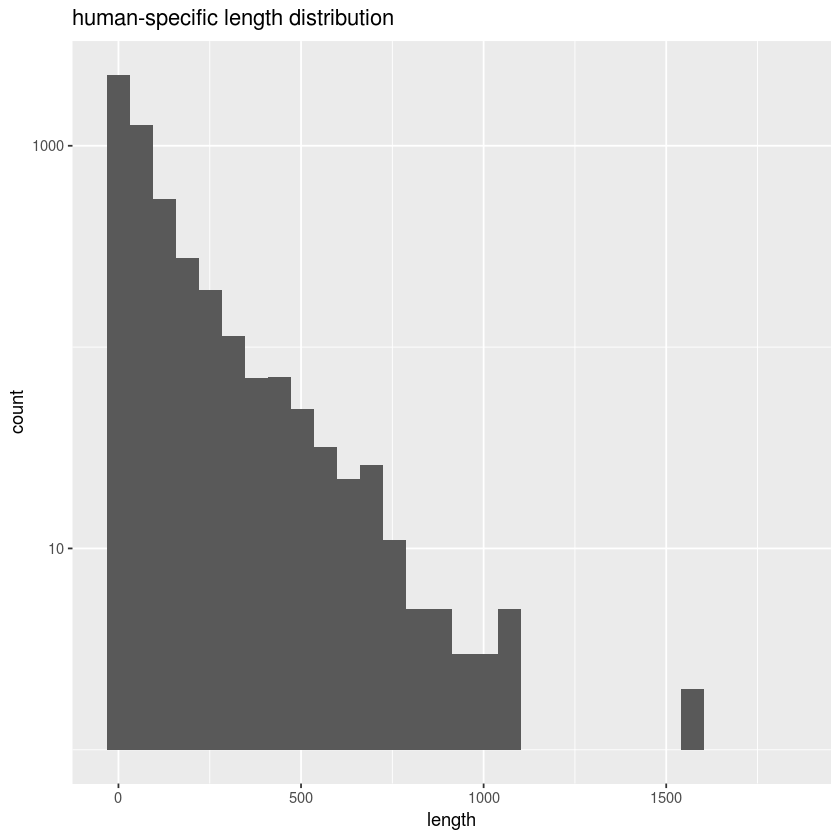

In [60]:
ggplot(data=df2, aes(length, color= enh_overlap)
      )+ 
geom_histogram()+
ggtitle("human-specific length distribution")+
scale_y_log10()

In [61]:
df_count <-plyr::count(df2, vars = c( "hg_spec","enh_overlap"))
head(df_count)

hg_spec,enh_overlap,freq
0,1,2564
0,2,918
0,3,508
0,4,300
0,5,180
0,6,122


In [62]:
graph_stuff <-function(bedfile){
    # make dataframe of the bedfile
    df <-read.table(bedfile, sep = '\t', h=F, stringsAsFactors=F)
    
    chr= unlist(strsplit(bedfile, "_"))[1]
    print(chr)
    ## format the table

    # rename columns
    names(df) = c("enh_chr", "enh_start", "enh_end", "enh_overlap", "enh_percentile", "hg_chr", "hg_start", "hg_end", "hg_strand", "hg_ref", "hg_spec", "hg_vspec", "hg-spec_names", "length")

    # convert species count columns from characters to integers 
    df$hg_spec <- as.integer(df$hg_spec)
    df$hg_vspec <- as.integer(df$hg_vspec)

    # calculate the length of fragment overlap in log10
    df$log10_length = log(df$length, 10)
    
    # create a subset of the dataframe to remove non-overlapping roadmap fragments in hg19 MSA
    df2 = subset(df, df$length >0)

    #make a subset of the counts
    df_count <-plyr::count(df2, vars = c( "hg_spec","enh_overlap"))
    
    ggplot(df_count, aes(y = enh_overlap, x =hg_spec)) + 
        geom_tile(aes(fill = freq), color = "white")+
        scale_fill_gradient(low = "steelblue",high = "white")+
        ggtitle(paste0("Hg19 Species Alignments x Roadmap Enhancer Sample-Overlap - ", chr))
    ggsave(paste0(chr,"_heatmap.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 7, height = 5, units = "in", dpi=300)
    
    ggplot(df2, aes(hg_spec)) + 
        geom_histogram(bins = 46) +
        ggtitle(paste0("overlap of hg19 species in roadmap enhancers (multi-intersected) - ", chr)) 
    ggsave(paste0(chr,"_histogram.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 7, height = 5, units = "in", dpi=300)
# relatedness of species/ misrepresentation of species diversity in dataset might skew our interpretation of this graph 
    
    ggplot(df2, aes(y = hg_spec, x = enh_overlap, color=log10_length)) + 
        geom_point() +
        scale_fill_gradient(low = "steelblue", high = "white")
    ggsave(paste0(chr,"_dot.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 8, height = 8, units = "in", dpi=300)
}



In [ ]:
for (bedfile in a){
        graph_stuff(bedfile)
    }

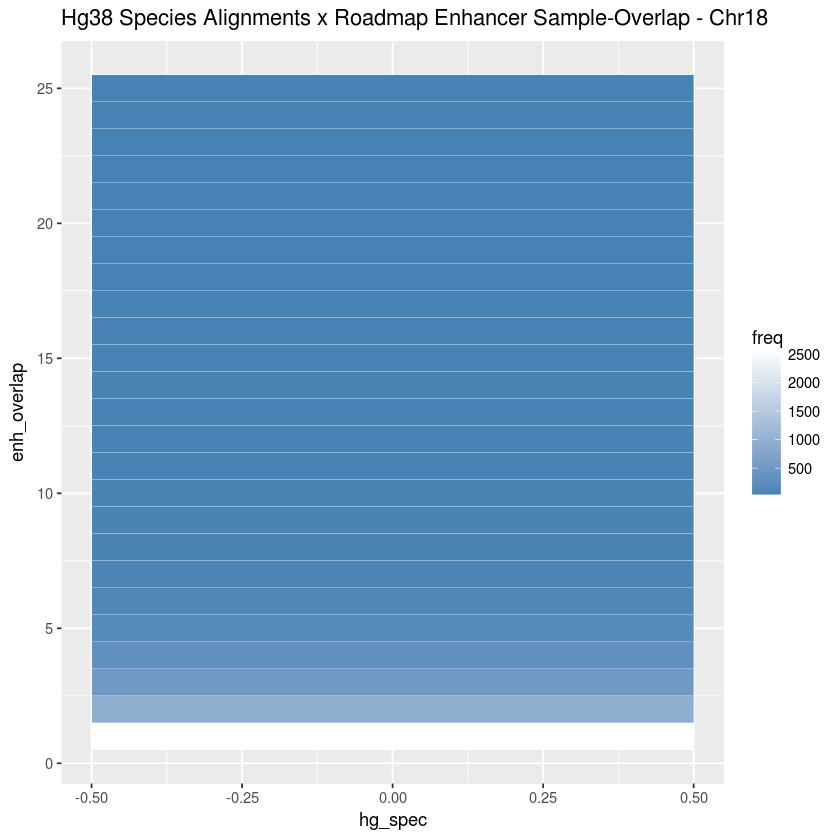

In [63]:
# the frequency of species-specific enhancers x the number of samples enhancers are found in
ggplot(df_count, aes(y = enh_overlap, x =hg_spec)) + 
geom_tile(aes(fill = freq), color = "white")+
scale_fill_gradient(low = "steelblue",high = "white")+
ggtitle("Hg38 Species Alignments x Roadmap Enhancer Sample-Overlap - Chr18")

ggsave("hspecific_hg38_heatmap.pdf", path = paste0(path,"/result_pdf/"), device = "pdf", width = 4, height = 4, units = "in", dpi=300)

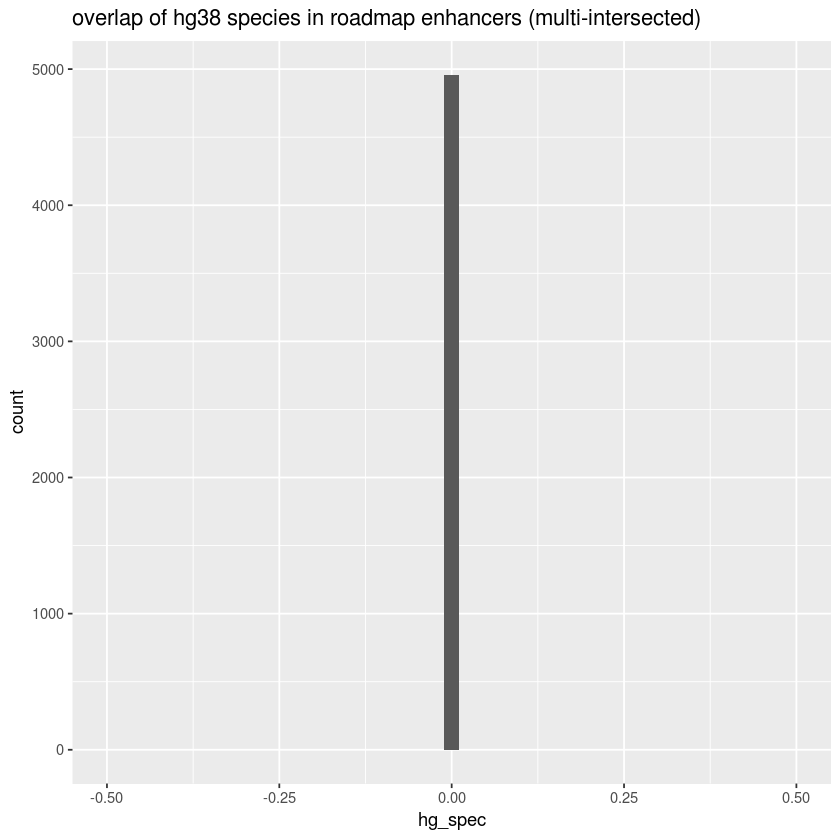

In [64]:
ggplot(df2, aes(hg_spec)) + 
geom_histogram(bins = 46) +
ggtitle("overlap of hg38 species in roadmap enhancers (multi-intersected)") 
ggsave("hspecific_hg38_histogram.pdf", path = paste0(path,"/result_pdf/"), device = "pdf", width = 4, height = 4, units = "in", dpi=300)
# relatedness of species/ misrepresentation of species diversity in dataset might skew our interpretation of this graph 

In [65]:
summary(df)

   enh_chr            enh_start            enh_end           enh_overlap    
 Length:4958        Min.   :    63671   Min.   :    63859   Min.   : 1.000  
 Class :character   1st Qu.: 31186624   1st Qu.: 31186670   1st Qu.: 1.000  
 Mode  :character   Median : 57713974   Median : 57714234   Median : 1.000  
                    Mean   : 74309433   Mean   : 74309702   Mean   : 2.613  
                    3rd Qu.:112749814   3rd Qu.:112749846   3rd Qu.: 3.000  
                    Max.   :248792057   Max.   :248792277   Max.   :25.000  
                                                                            
 enh_percentile      hg_chr             hg_start             hg_end         
 Min.   :0.1000   Length:4958        Min.   :    62890   Min.   :    63829  
 1st Qu.:0.1000   Class :character   1st Qu.: 31182600   1st Qu.: 31186923  
 Median :0.1000   Mode  :character   Median : 57713927   Median : 57725251  
 Mean   :0.2631                      Mean   : 74303980   Mean   : 74312313  

In [ ]:
lapply(df2, class)
str(df2)

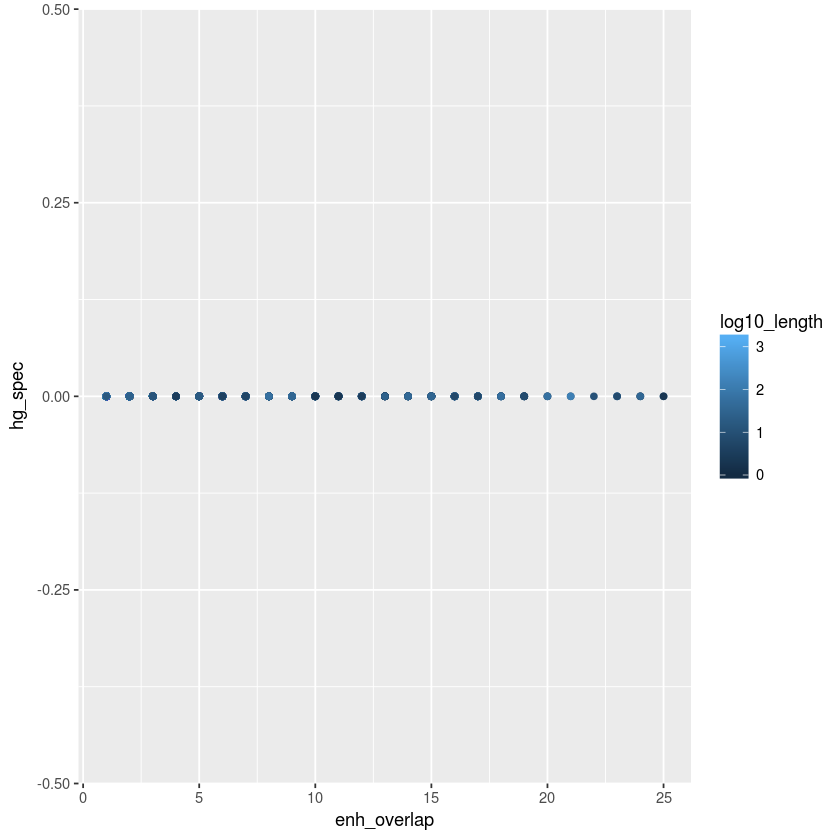

In [66]:
ggplot(df2, aes(y = hg_spec, x = enh_overlap, color=log10_length)) + 
geom_point() +
scale_fill_gradient(low = "steelblue", high = "white")+
ggsave("hspecific_hg38_dot.pdf", path = paste0(path,"/result_pdf/"), device = "pdf", width = 4, height = 4, units = "in", dpi=300)